# Wordle ML Project

In [1]:
# !pip install nltk

In [2]:
import csv
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [3]:
# this is all possiable words that can be the solution.

file = open("valid_solutions.csv", "r")
csv_reader = csv.reader(file)

lists_from_csv = []
for row in csv_reader:
    lists_from_csv.append(row)
lists_from_csv.pop(0)  
print(lists_from_csv)


[['aback'], ['abase'], ['abate'], ['abbey'], ['abbot'], ['abhor'], ['abide'], ['abled'], ['abode'], ['abort'], ['about'], ['above'], ['abuse'], ['abyss'], ['acorn'], ['acrid'], ['actor'], ['acute'], ['adage'], ['adapt'], ['adept'], ['admin'], ['admit'], ['adobe'], ['adopt'], ['adore'], ['adorn'], ['adult'], ['affix'], ['afire'], ['afoot'], ['afoul'], ['after'], ['again'], ['agape'], ['agate'], ['agent'], ['agile'], ['aging'], ['aglow'], ['agony'], ['agora'], ['agree'], ['ahead'], ['aider'], ['aisle'], ['alarm'], ['album'], ['alert'], ['algae'], ['alibi'], ['alien'], ['align'], ['alike'], ['alive'], ['allay'], ['alley'], ['allot'], ['allow'], ['alloy'], ['aloft'], ['alone'], ['along'], ['aloof'], ['aloud'], ['alpha'], ['altar'], ['alter'], ['amass'], ['amaze'], ['amber'], ['amble'], ['amend'], ['amiss'], ['amity'], ['among'], ['ample'], ['amply'], ['amuse'], ['angel'], ['anger'], ['angle'], ['angry'], ['angst'], ['anime'], ['ankle'], ['annex'], ['annoy'], ['annul'], ['anode'], ['antic']

In [4]:
dic = {}


for i in lists_from_csv:
    for j in i:
        for k in j:
            if k in dic:
                val = dic[k]
                dic[k] = val + 1
            else:
                dic[k] = 0

                
print(dic)

lettercountdf = pd.DataFrame([dic])



{'a': 978, 'b': 280, 'c': 476, 'k': 209, 's': 668, 'e': 1232, 't': 728, 'y': 424, 'o': 753, 'h': 388, 'r': 898, 'i': 670, 'd': 392, 'l': 718, 'u': 466, 'v': 152, 'n': 574, 'g': 310, 'p': 366, 'm': 315, 'f': 229, 'x': 36, 'w': 194, 'z': 39, 'j': 26, 'q': 28}


In [5]:
# plt.bar(lettercountdf)


In [6]:
fix=pd.melt(lettercountdf)
fix

,variable,value
0,a,978
1,b,280
2,c,476
3,k,209
4,s,668
5,e,1232
6,t,728
7,y,424
8,o,753
9,h,388


In [7]:
fix = fix.rename(columns={'variable':'Letter' ,'value':'Apperience' })
fix = fix.sort_values("Letter")

fix

,Letter,Apperience
0,a,978
1,b,280
2,c,476
12,d,392
5,e,1232
20,f,229
17,g,310
9,h,388
11,i,670
24,j,26


Text(0.5, 1.0, 'Freq of letters')

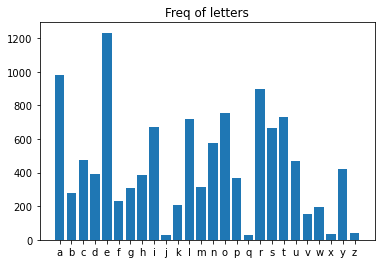

In [8]:
# plt.bar(fix )

arr =np.array(  fix['Letter'])
arr2 =np.array( fix['Apperience'])

plt.bar(x=arr,height=arr2)
plt.title("Freq of letters")

Text(0.5, 1.0, 'Freq of letters')

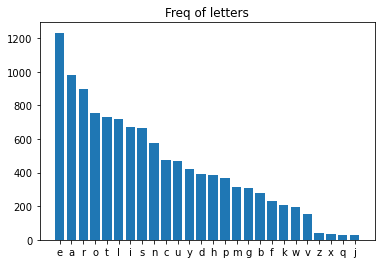

In [9]:
fix = fix.sort_values("Apperience",ascending = False)

arr =np.array(  fix['Letter'])
arr2 =np.array( fix['Apperience'])

plt.bar(x=arr,height=arr2)
plt.title("Freq of letters")

In [10]:
def most_frequent(List):
    return max(set(List), key = List.count)

In [11]:
maxchar1 = []
maxchar2 = []
maxchar3 = []
maxchar4 = []
maxchar5 = []


for i in lists_from_csv:
    for j in i:
        maxchar1.append(j[0])
        maxchar2.append(j[1])
        maxchar3.append(j[2])
        maxchar4.append(j[3])
        maxchar5.append(j[4])
print("this is the most common first letter " + most_frequent(maxchar1))
print("this is the most common second letter " +most_frequent(maxchar2))
print("this is the most common third letter " +most_frequent(maxchar3))
print("this is the most common fourth letter " +most_frequent(maxchar4))
print("this is the most common fifth letter " +most_frequent(maxchar5))

this is the most common first letter s
this is the most common second letter a
this is the most common third letter a
this is the most common fourth letter e
this is the most common fifth letter e


In [12]:

pickword = lists_from_csv[np.random.randint(len(lists_from_csv)-1)][0]
print(pickword)

stove


In [13]:
def bruteforce():
    count = 0
    pickword = lists_from_csv[np.random.randint(len(lists_from_csv)-1)][0]
    for i in lists_from_csv:
        count += 1
        if i[0] == pickword:
            return count

In [14]:
avg = []
for i in range(1000):
    avg.append(bruteforce())

avg = np.array(avg)
mean = np.mean(avg)
std = np.std(avg)
print("Mean: " + str(mean))
print("STD: " + str(std))

Mean: 1134.374
STD: 690.6346430088778


In [15]:
def noinfoGain():
    pickword = lists_from_csv[np.random.randint(len(lists_from_csv)-1)][0]
    count = 0
    guessList = []
    for i in range(len(lists_from_csv)+200):
        randomGuess = lists_from_csv[np.random.randint(len(lists_from_csv)-1)][0] 
        if randomGuess in guessList:
            i = count
        else:
            guessList.append(randomGuess)
            count += 1
            if  randomGuess == pickword:
                return count
    return len(lists_from_csv)

In [29]:
avg = []
for i in range(1000):
    avg.append(noinfoGain())

avg = np.array(avg)
mean = np.mean(avg)
std = np.std(avg)
print("Mean: " + str(mean))
print("STD: " + str(std))

Mean: 1300.822
STD: 820.8564334376626


In [102]:
def fixList(List):
    NewList = []
    for i in List:
        for j in i:
            NewList.append(j)
    return NewList

In [103]:
FixingTheList = fixList(lists_from_csv)
print(FixingTheList)

['aback', 'abase', 'abate', 'abbey', 'abbot', 'abhor', 'abide', 'abled', 'abode', 'abort', 'about', 'above', 'abuse', 'abyss', 'acorn', 'acrid', 'actor', 'acute', 'adage', 'adapt', 'adept', 'admin', 'admit', 'adobe', 'adopt', 'adore', 'adorn', 'adult', 'affix', 'afire', 'afoot', 'afoul', 'after', 'again', 'agape', 'agate', 'agent', 'agile', 'aging', 'aglow', 'agony', 'agora', 'agree', 'ahead', 'aider', 'aisle', 'alarm', 'album', 'alert', 'algae', 'alibi', 'alien', 'align', 'alike', 'alive', 'allay', 'alley', 'allot', 'allow', 'alloy', 'aloft', 'alone', 'along', 'aloof', 'aloud', 'alpha', 'altar', 'alter', 'amass', 'amaze', 'amber', 'amble', 'amend', 'amiss', 'amity', 'among', 'ample', 'amply', 'amuse', 'angel', 'anger', 'angle', 'angry', 'angst', 'anime', 'ankle', 'annex', 'annoy', 'annul', 'anode', 'antic', 'anvil', 'aorta', 'apart', 'aphid', 'aping', 'apnea', 'apple', 'apply', 'apron', 'aptly', 'arbor', 'ardor', 'arena', 'argue', 'arise', 'armor', 'aroma', 'arose', 'array', 'arrow', 

In [104]:

def newList(List , banList):
    
    if not banList:
        return List
    else:
        for t in banList:
            for q in List:
            #print(q)
                if t in q:
                    List.remove(q)      
    return List
        
    

In [111]:
FixingTheList = fixList(lists_from_csv)
def littleinfoGain(PlayableList , newword , word , Mode, count ):
    Count = count + 1 
    #print(Count)
    if Mode == "R":
        
        if newword == True:
            pickword = FixingTheList[np.random.randint(len(lists_from_csv)-1)]
            #print(pickword)
            randomGuess = PlayableList[np.random.randint(len(PlayableList)-1)]
            #print("here for the first time")
        else:
            pickword = word
            randomGuess = PlayableList[np.random.randint(len(PlayableList))]
        #print(str(pickword) +"   +   "+ str(randomGuess))
        if str(pickword) == str(randomGuess):
            return Count
        #pickword=list(pickword)
        randomGuess = list(randomGuess)
   
    #print(randomGuess)
        banList = []
        score = [0,0,0,0,0]
        #print(randomGuess)
        for i in range(5):
            if randomGuess[i] not in pickword:
                banList.append(randomGuess[i])
        if not banList:
            return littleinfoGain(PlayableList , False, pickword, "L", Count)
        new = newList(PlayableList,banList)
        return littleinfoGain(new , False, pickword,"R",Count)
    elif Mode == "L":
        pickword = word
        #print("we made to brute force")
        #print(Count)
        for i in PlayableList:
            Count += 1
            #print(str(Count) + str(i))
            if str(i) == str(pickword):
                print(i)
                print(Count)
                return Count
    return Count
    
guesses = littleinfoGain(FixingTheList , True , "" ,"R",0)

share
47


In [112]:
avg = []
for i in range(1000):
    FixingTheList = fixList(lists_from_csv)
    avg.append(littleinfoGain(FixingTheList , True , "" ,"R",0))

avg = np.array(avg)
mean = np.mean(avg)
std = np.std(avg)
print("Mean: " + str(mean))
print("STD: " + str(std))

spunk
22
bulky
18
horse
140
cargo
16
bawdy
17
flora
26
pansy
26
youth
47
saint
34
swath
110
mouth
33
pluck
15
qualm
20
mafia
45
baton
17
trice
59
tonga
49
bulge
16
fried
43
decal
19
yearn
45
erupt
18
align
22
ovine
23
sperm
32
niche
26
roach
26
yield
42
cigar
17
farce
21
cloak
120
close
30
chili
14
plier
49
gamer
52
swath
23
deity
17
lance
41
drank
19
shuck
19
flier
23
event
15
hyena
23
brake
23
fancy
66
bluff
12
ridge
36
snarl
26
wheat
97
balmy
76
chair
18
haute
21
short
88
cynic
14
terra
2036
grate
36
fatty
18
usual
28
quiet
22
loser
35
until
24
flume
39
burly
18
slump
22
diner
23
heist
23
hoist
17
tamer
2012
siren
124
erode
23
swine
23
shrub
58
flick
23
tacit
22
cried
54
basin
13
flash
27
rifle
46
argue
15
thong
18
magic
22
frail
159
probe
42
earth
24
nobly
142
wrote
42
octal
65
eight
34
leper
27
civil
15
mealy
65
balmy
13
whole
23
horde
31
surge
32
shrub
101
sandy
38
chute
17
eaten
22
anime
20
cable
20
wince
31
blend
16
glean
25
slick
30
budge
14
swift
21
palsy
39
float
22
tweak
29